# EDA Beer Recipes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [2]:
SEED = 42

In [3]:
sns.set_theme(style="ticks")
random.seed(SEED)
np.random.seed(SEED)

## Load data and first observing.

In [4]:
df = pd.read_csv('../data/beer_train.csv', index_col=['id'])

In [5]:
df.head()

,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,,
0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,NaN,31.0,N,LoonyToonTripel,1.070,8
1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,Pint,45.0,N,Covert Hops,1.056,35
2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,Mug,25.0,N,Oktoberfest,1.048,10
3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,Pint,55.0,N,Pale Ale,1.044,5
4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,Pint,11.4,N,Head Turner Blonde Ale,1.045,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   abv              6000 non-null   float64
 1   available        6000 non-null   object 
 2   description      5521 non-null   object 
 3   glass            3658 non-null   object 
 4   ibu              6000 non-null   float64
 5   isOrganic        6000 non-null   object 
 6   name             6000 non-null   object 
 7   originalGravity  6000 non-null   float64
 8   srm              6000 non-null   object 
dtypes: float64(3), object(6)
memory usage: 468.8+ KB


In [7]:
df.describe()

,abv,ibu,originalGravity
count,6000.000000,6000.000000,6000.000000
mean,6.502388,41.196878,1.053993
std,1.833054,28.846228,0.021747
min,0.200000,1.000000,1.000000
25%,5.200000,22.000000,1.044000
50%,6.000000,33.000000,1.050000
75%,7.400000,55.000000,1.060000
max,19.700000,1000.000000,1.980000


In [8]:
df.nunique()

abv                 210
available             8
description        5502
glass                12
ibu                 384
isOrganic             2
name               5563
originalGravity     128
srm                  75
dtype: int64

**Numeric features**: abv, originalGravity.

**Categorical features**: available, glass, isOrganic.

**Text features**: description, name.

SRM (Standard Reference Method) is North America’s gold standard for measuring the color of your beer. 

Therefore, it must be numeric feature. I'll fix it late.

In [9]:
print('Percent of nan valuse:')
round(df.isna().sum()/len(df)*100, 2)

Percent of nan valuse:


abv                 0.00
available           0.00
description         7.98
glass              39.03
ibu                 0.00
isOrganic           0.00
name                0.00
originalGravity     0.00
srm                 0.00
dtype: float64

There ar around 8% and 39% of missing values in columns glass and description.

In [10]:
print('Duplicates: ', df.duplicated().sum())

Duplicates:  3


There are 3 duplicates.

In [11]:
df.drop_duplicates(inplace=True)

## Data exploratory and  preprocessing

### SRM

**srm** - Standard Reference Method is one of several systems modern brewers use to specify beer color.

There are no Nans.

In the df.info we can see that it's object features. It doesn't logical. Therefore, let fix it.

In [12]:
df.srm.unique()

array(['8', '35', '10', '5', '3', 'Over 40', '7', '11', '2', '14', '4',
       '40', '15', '20', '32', '9', '98', '22', '6', '26', '12', '30',
       '21', '100', '13', '29', '17', '45', '18', '25', '38', '47', '27',
       '37', '16', '33', '23', '49', '28', '31', '41', '24', '50', '19',
       '39', '34', '48', '44', '71', '57', '1', '36', '94', '43', '42',
       '46', '69', '53', '87', '62', '66', '95', '74', '72', '92', '86',
       '63', '64', '99', '91', '93', '75', '58', '85', '81'], dtype=object)

Wrong value is "Over 40".

In [13]:
sum(df.srm == 'Over 40')

211

In [14]:
df[df.srm == 'Over 40']

,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,,
5,6.40,Available during the spring months.,"First brewed in 2011, Black Lightning is all t...",Pint,65.0,N,Black Lighting,1.063,Over 40
22,13.50,Limited availability.,This righteously flavorful imperial stout has ...,NaN,45.0,Y,Stone Farking Wheaton w00tstout 3.0,1.080,Over 40
100,10.70,Limited availability.,Tear off your suit-and-tie straightjacket. Sub...,Tulip,98.0,N,B/A/Y/S V3.0 - Cabernet Sauvignon (Ghost 414),1.080,Over 40
124,8.50,"Available at the same time of year, every year.",This high gravity stout has a vast array of ro...,Pint,75.0,N,Russian Imperial Stout,1.080,Over 40
148,4.80,Available year round as a staple beer.,This dark toasted oat flavor has a smooth fini...,Pint,31.0,N,Taildragger I.F.R.,1.038,Over 40
...,...,...,...,...,...,...,...,...,...
5879,5.70,Available year round as a staple beer.,Our award winning coffee beer! Robust Porter ...,Pint,23.0,N,Java Porter,1.030,Over 40
5906,11.70,Beer is not available.,"A heavily-hopped imperial stout, Night Stalker...",Snifter,60.0,N,Night Stalker,1.080,Over 40
5913,11.03,Available during the winter months.,Behold the stunning crimson hues through the i...,Tulip,55.0,N,The Czar,1.104,Over 40


As we can see it's dark beer. In this way we can replace "Over 40" by mean value of other dark bear ( srm > 40).

In [15]:
srm_over_40_idx = (pd.to_numeric(df[df.srm != 'Over 40'].srm) > 40).values
num_srm = pd.to_numeric(df[df.srm != 'Over 40'].srm)
srm_over_40_mean = int(num_srm[num_srm > 40].mean())
srm_over_40_mean

60

In [16]:
df.replace({'srm' : {'Over 40' : str(srm_over_40_mean)}}, inplace=True)
df = df.astype({'srm' : 'int32'})

In [17]:
df.describe()

,abv,ibu,originalGravity,srm
count,5997.000000,5997.000000,5997.000000,5997.000000
mean,6.500305,41.179134,1.053978,16.453393
std,1.831066,28.841757,0.021742,14.459590
min,0.200000,1.000000,1.000000,1.000000
25%,5.200000,22.000000,1.044000,6.000000
50%,6.000000,33.000000,1.050000,12.000000
75%,7.400000,55.000000,1.060000,21.000000
max,19.700000,1000.000000,1.980000,100.000000


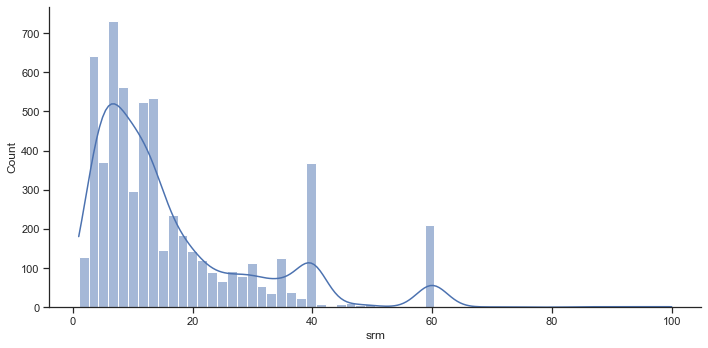

In [18]:
sns.displot(df.srm, kde=True, height=5, aspect=2, kind='hist');

### ABV

**abv** - Alcohol by Volume of the beer. Unit is percentage.

There are no Nans.

Let's look at abv distribution.

In [19]:
df.abv.describe().to_frame()

,abv
count,5997.000000
mean,6.500305
std,1.831066
min,0.200000
25%,5.200000
50%,6.000000
75%,7.400000
max,19.700000


There are no outliers, max < 100, min > 0. 

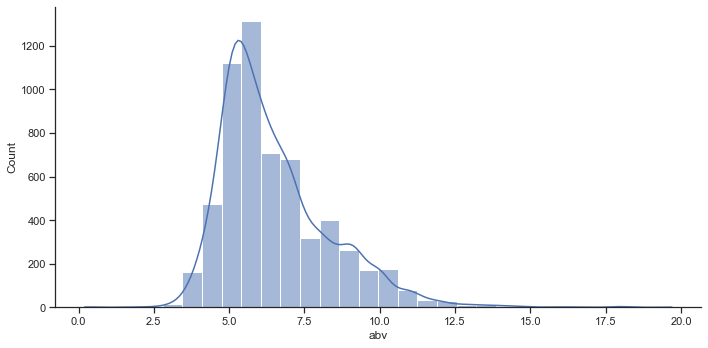

In [20]:
sns.displot(df.abv, kde=True, height=5, aspect=2, kind='hist', bins=30);

### Available             

**available** - when the beer is available.

There are no Nans.

Let's look at abv distribution.

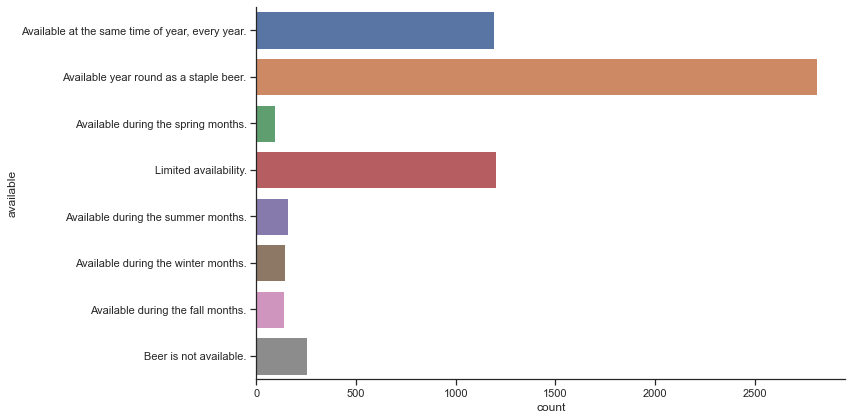

In [21]:
sns.catplot(data=df, y='available', kind='count', height=6, aspect=2);

In [22]:
print('Ratio of feature in percent')
round(df.available.value_counts()/len(df)*100, 2)

Ratio of feature in percent


Available year round as a staple beer.             46.89
Limited availability.                              20.03
Available at the same time of year, every year.    19.88
Beer is not available.                              4.25
Available during the summer months.                 2.65
Available during the winter months.                 2.37
Available during the fall months.                   2.35
Available during the spring months.                 1.58
Name: available, dtype: float64

### Description

**description** - description of the beer.

This is text feature which has about 8% of missing values.
I won't use it in training.

### Glass

**glass** - the type of glass that the beer is intended to be served in.

This feature has about 39% of missing values.


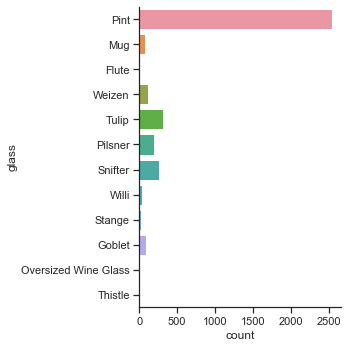

In [23]:
sns.catplot(data=df, y='glass', kind='count');

Let's see at distribution of other features for missing values.

In [24]:
df[df.glass.isna()].describe()

,abv,ibu,originalGravity,srm
count,2342.000000,2342.000000,2342.000000,2342.000000
mean,6.611939,41.700933,1.053890,16.304014
std,1.850201,25.930803,0.021673,13.425026
min,0.200000,1.059000,1.004050,1.000000
25%,5.300000,23.000000,1.044000,7.000000
50%,6.200000,34.000000,1.050000,12.000000
75%,7.500000,56.000000,1.060000,20.750000
max,19.700000,200.000000,1.720000,99.000000


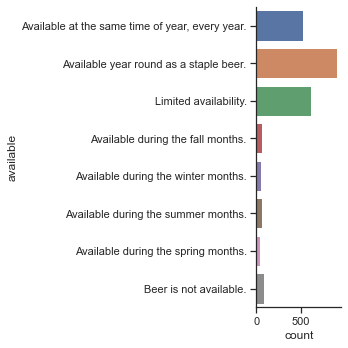

In [25]:
sns.catplot(data=df[df.glass.isna()], y='available', kind='count');

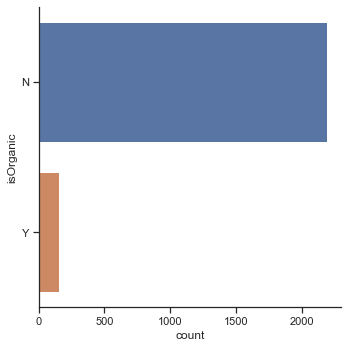

In [26]:
sns.catplot(data=df[df.glass.isna()], y='isOrganic', kind='count');

I couldn't see any dependences between missing values of glass and other features, thus I'll fill nan with new value, for example, Nglass. It would be a new category.

In [27]:
df.glass = df.glass.fillna('Nglass')

### Name

**name** - the name of the beer.

It's text features without nan values. I won't use it in trainig.

### isOrganic

**isOrganic** - "Y" if the beer is organic, "N" otherwise.

There are no missing values in this feature.

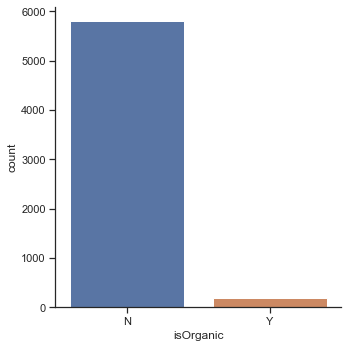

In [28]:
sns.catplot(data=df, x='isOrganic', kind='count');

As we can see most values aren't organic.

Now lets see dependeces between IBU and isOrganic.

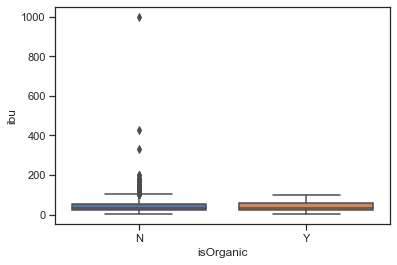

In [29]:
sns.boxplot(data=df, y='ibu', x='isOrganic');

Acording to boxplots organic and non-organic beer have the same distribution of target value (ibu).

In [30]:
# convert column into numeric
df.isOrganic = (df.isOrganic == 'Y').astype('int32')

### originalGravity  

**originalGravity** - original gravity of the beer.
Gravity is a measurement of beer's density. An original gravity (OG) reading indicates the number of dissolved sugars in the beer that can be converted into alcohol.

There is no missing values in this column.

In [31]:
df.originalGravity.describe()

count    5997.000000
mean        1.053978
std         0.021742
min         1.000000
25%         1.044000
50%         1.050000
75%         1.060000
max         1.980000
Name: originalGravity, dtype: float64

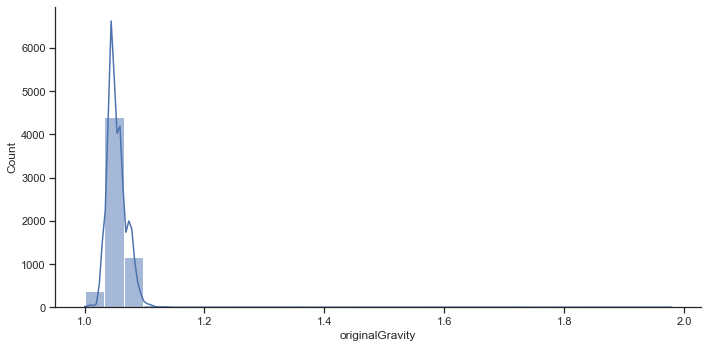

In [32]:
sns.displot(df.originalGravity, kde=True, height=5, aspect=2, kind='hist', bins=30);

OriginalGravity can't be higher then 1.13. In this case we should clip gravity values.

In [33]:
sum(df.originalGravity >= 1.13)

5

There are 5 wrong values. Lets clip them.

In [34]:
df.originalGravity = df.originalGravity.clip(upper=1.13)

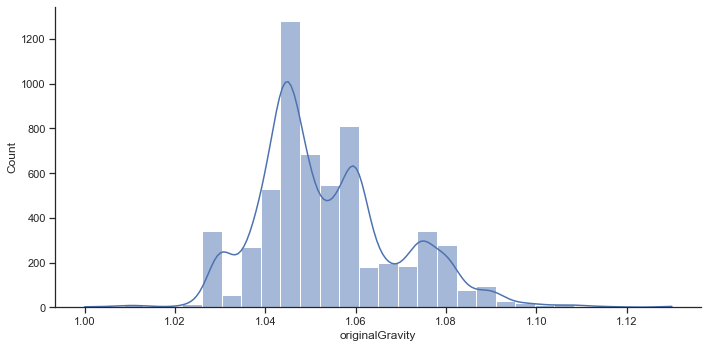

In [35]:
sns.displot(df.originalGravity, kde=True, height=5, aspect=2, kind='hist', bins=30);

Now chart looks better. There is almost normal distribution.

### IBU

**ibu** - International Bitter Units are a chemical measurement of the number of bittering compounds, specifically isomerized and oxidized alpha acids, polyphenols, and a few other select bittering chemicals, that make your beer taste bitter. The IBU correlates well, in most cases, with the sensory bitterness of beer, and this is why brewers use it.

**It is a target value in this project.**


In [36]:
df.ibu.describe()

count    5997.000000
mean       41.179134
std        28.841757
min         1.000000
25%        22.000000
50%        33.000000
75%        55.000000
max      1000.000000
Name: ibu, dtype: float64

Max value of this measurement can't be higher 120. As a result we should limit target value.

In [37]:
df.ibu = df.ibu.clip(upper=120)

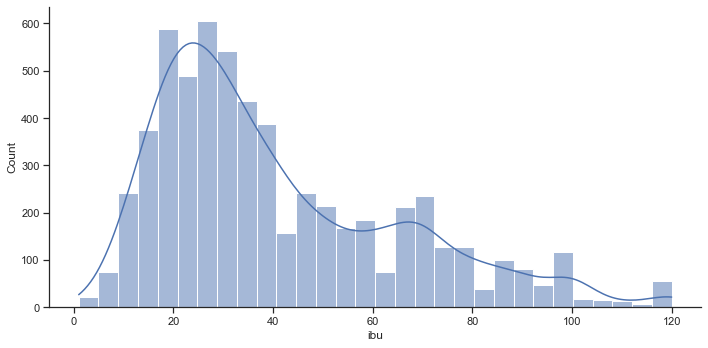

In [38]:
sns.displot(df.ibu, kde=True, height=5, aspect=2, kind='hist', bins=30);

### Insides

In [39]:
label_features = ['isOrganic']
one_hot_features = ['available', 'glass']
text_features = ['description', 'name']
num_features = ['originalGravity', 'abv', 'srm']
target = ['ibu']

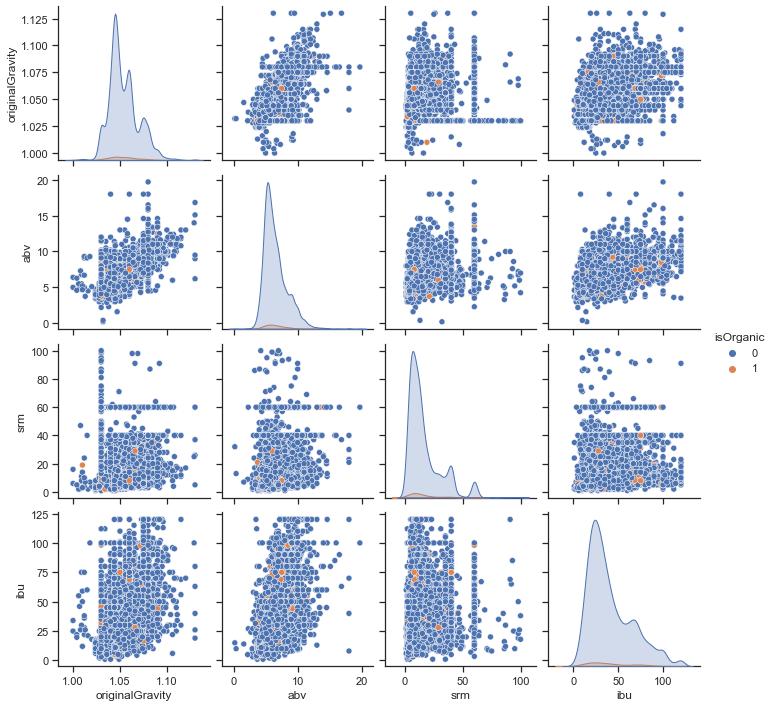

In [40]:
sns.pairplot(data=df[num_features+target+label_features], hue='isOrganic');

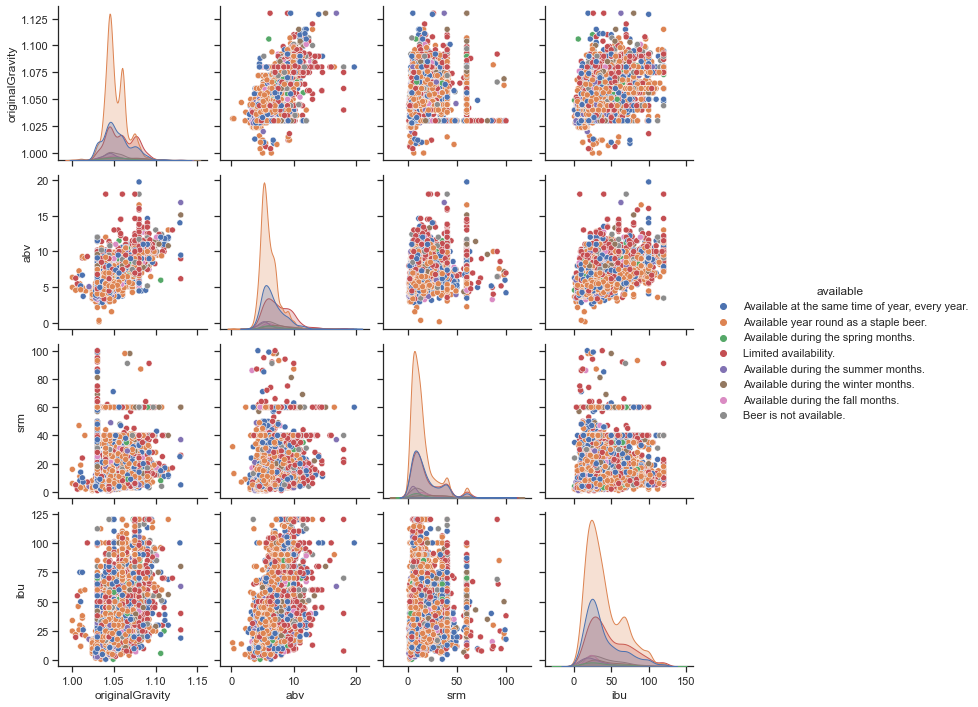

In [41]:
sns.pairplot(data=df[num_features+target+['available']], hue='available');

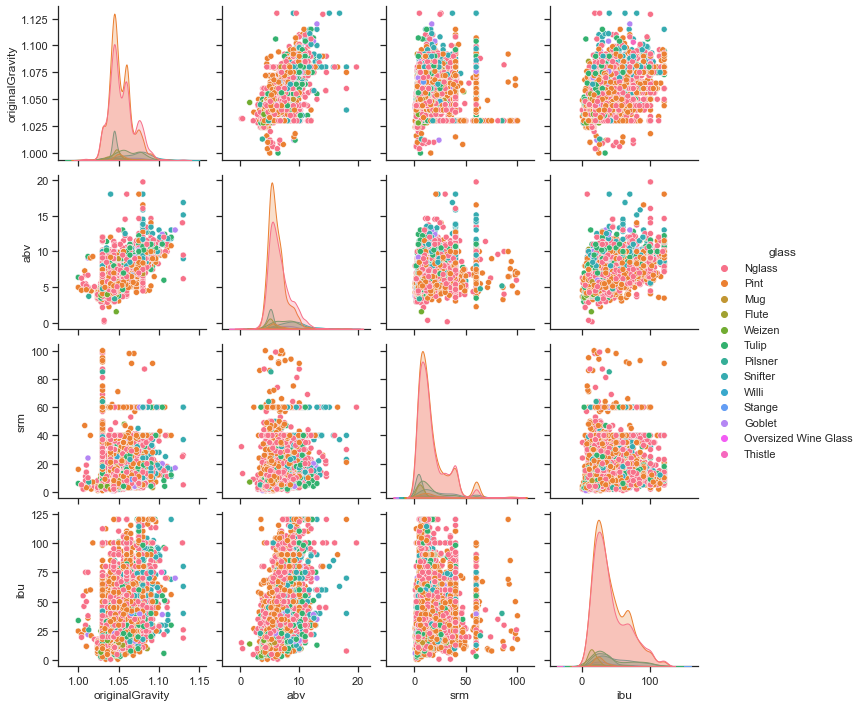

In [42]:
sns.pairplot(data=df[num_features+target+['glass']], hue='glass');

I couldn't see any dependencies on this plots.

Now lets plot correlation matrix.

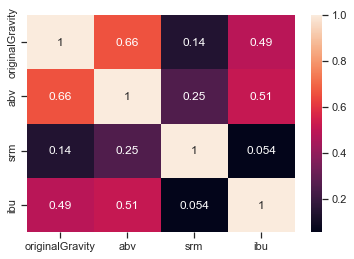

In [43]:
sns.heatmap(df[num_features+target].corr(), annot=True);

**Best correlation with target variable (ibu) have features abv and originalGravity.**